In [1]:
%matplotlib inline
import pandas as pd

In [2]:
titles = pd.read_csv('../dataset/titles.csv')

# faster to calculates such 30s or 50s .)

titles['decades'] = titles['year'] // 10 * 10


titles.head()

,title,year,decades
0,Chatur Singh Two Star,2011,2010
1,Night Train for Inverness,1960,1960
2,Njiur melambai,1951,1950
3,Roya-ye nime-shab-e tabestan,1994,1990
4,Undskyld jeg forstyrrer,2012,2010


In [3]:
cast = pd.read_csv('../dataset/cast.csv')

cast['decades'] = cast['year'] // 10 * 10

cast.head()

,title,year,name,type,character,n,decades
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,2010
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0,1980
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0,2010
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN,2010
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN,2010


In [11]:
k = cast

g = k.groupby(['decades', 'type']).size()


# how can we compare them
g_unstack = g.unstack()

g_unstack #, type(g_unstack)

# g_unstack[['actor']]  , unstack returns a dataframe!

# more interesting way :)

type,actor,actress
decades,,
1890,2,1
1900,54,16
1910,27605,15830
1920,48726,24075
1930,151290,49972
1940,162364,51795
1950,157738,57733
1960,134605,57744
1970,152811,66974


In [12]:
uyy = g.unstack(0)

uyy

decades,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2110
type,,,,,,,,,,,,,,,
actor,2,54,27605,48726,151290,162364,157738,134605,152811,197530,263000,489468,747346,140,2
actress,1,16,15830,24075,49972,51795,57733,57744,66974,91509,125040,263941,448737,127,1


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [31]:
m = k[(k.character == 'Superman') | (k.character == 'Batman')]

gm = m.groupby(['year', 'character']).size()

gm.unstack(0).fillna(0)


year,1938,1940,1943,1948,1949,1950,1951,1953,1954,1955,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
character,,,,,,,,,,,,,,,,,,,,,
Batman,1.0,1.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,...,3.0,3.0,4.0,2.0,5.0,5.0,4.0,12.0,9.0,4.0
Superman,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,5.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,5.0,2.0


In [38]:
z = gm.unstack().fillna(0)

# z['Superman'] - z['Batman']
sss = z.Superman - z.Batman

len(sss[sss > 0]), type(sss)

(11, pandas.core.series.Series)

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [8]:
len(sss[sss < 0])

27

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

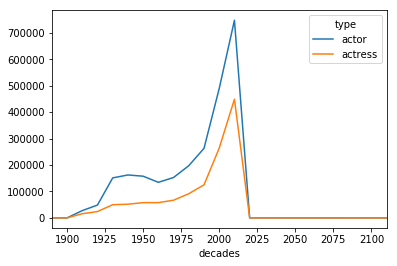

In [42]:
k = cast

g = k.groupby(['decades', 'type']).size()

g.unstack().plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

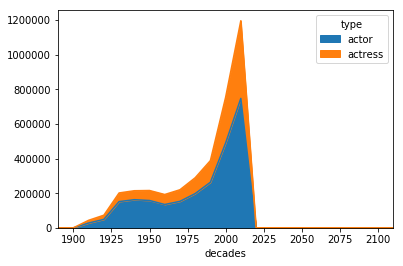

In [10]:
g.unstack().plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

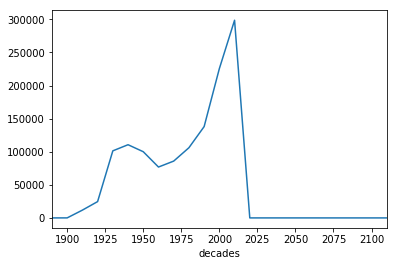

In [44]:
diff = g_unstack.actor - g_unstack.actress

diff.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

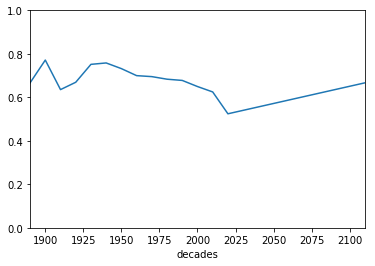

In [12]:
fraction = g_unstack.actor / ( g_unstack.actor + g_unstack.actress)

fraction.plot(ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

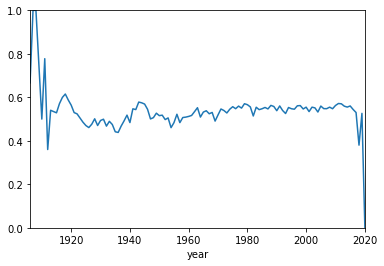

In [23]:
supporting = cast

supporting = cast[cast.n == 2]
supporting = supporting.groupby(['year', 'type']).size()
supporting = supporting.unstack().fillna(0)

(supporting.actor/ (supporting.actor + supporting.actress)).plot(ylim=[0, 1])



### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

In [50]:
supporting = cast

supporting = cast[cast.n <= 3]
supporting = supporting.groupby(['year', 'type', 'n']).size()

supporting

year  type     n  
1906  actor    1.0       2
               2.0       2
      actress  1.0       1
               2.0       1
               3.0       1
1907  actor    1.0       1
               2.0       1
               3.0       1
1908  actor    1.0       1
               2.0       2
               3.0       2
1909  actor    1.0       1
1910  actor    1.0       1
               2.0       2
               3.0       3
      actress  1.0       4
               2.0       2
1911  actor    1.0      16
               2.0      14
               3.0      14
      actress  1.0       8
               2.0       4
               3.0       4
1912  actor    1.0      17
               2.0       9
               3.0      14
      actress  1.0      12
               2.0      16
               3.0       6
1913  actor    1.0      78
                      ... 
2015  actor    3.0    2314
      actress  1.0    1416
               2.0    1797
               3.0    1580
2016  actor    1.0    2880
         

In [51]:
supporting = supporting.unstack('type').fillna(0)

supporting

type       actor  actress
year n                   
1906 1.0     2.0      1.0
     2.0     2.0      1.0
     3.0     0.0      1.0
1907 1.0     1.0      0.0
     2.0     1.0      0.0
     3.0     1.0      0.0
1908 1.0     1.0      0.0
     2.0     2.0      0.0
     3.0     2.0      0.0
1909 1.0     1.0      0.0
1910 1.0     1.0      4.0
     2.0     2.0      2.0
     3.0     3.0      0.0
1911 1.0    16.0      8.0
     2.0    14.0      4.0
     3.0    14.0      4.0
1912 1.0    17.0     12.0
     2.0     9.0     16.0
     3.0    14.0      6.0
1913 1.0    78.0     49.0
     2.0    60.0     51.0
     3.0    73.0     25.0
1914 1.0   229.0    145.0
     2.0   178.0    155.0
     3.0   222.0     91.0
1915 1.0   370.0    303.0
     2.0   339.0    302.0
     3.0   404.0    202.0
1916 1.0   467.0    505.0
     2.0   528.0    397.0
...          ...      ...
2010 3.0  1937.0   1262.0
2011 1.0  2887.0   1189.0
     2.0  2178.0   1632.0
     3.0  2217.0   1387.0
2012 1.0  2880.0   1273.0
     2.0  2196.0   1655.0
     3.0  2260.0   1405.0
2013 1.0  3010.0   1293.0
     2.0  2258.0   1779.0
     3.0  2333.0   1449.0
2014 1.0  3029.0   1370.0
     2.0  2289.0   1834.0
     3.0  2356.0   1505.0
2015 1.0  2970.0   1416.0
     2.0  2290.0   1797.0
     3.0  2314.0   1580.0
2016 1.0  2880.0   1466.0
     2.0  2222.0   1861.0
     3.0  2222.0   1636.0
2017 1.0  2346.0   1592.0
     2.0  1977.0   1752.0
     3.0  1922.0   1494.0
2018 1.0   418.0    549.0
     2.0   344.0    561.0
     3.0   304.0    466.0
2019 1.0    12.0     16.0
     2.0    10.0      9.0
     3.0     7.0     11.0
2020 1.0     4.0      0.0
     2.0     0.0      1.0

[342 rows x 2 columns]

In [52]:
supporting = (supporting.actor/ (supporting.actor + supporting.actress)).unstack('n')

supporting

n,1.0,2.0,3.0
year,,,
1906,0.666667,0.666667,0.000000
1907,1.000000,1.000000,1.000000
1908,1.000000,1.000000,1.000000
1909,1.000000,NaN,NaN
1910,0.200000,0.500000,1.000000
1911,0.666667,0.777778,0.777778
1912,0.586207,0.360000,0.700000
1913,0.614173,0.540541,0.744898
1914,0.612299,0.534535,0.709265


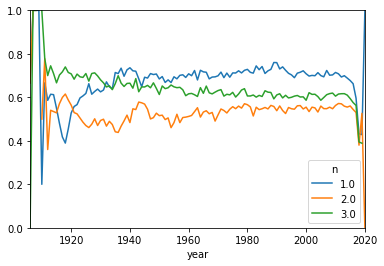

In [68]:
supporting.plot(ylim=[0, 1])
